# A Simple Autoencoder

We'll start off by building a simple autoencoder to compress the MNIST dataset. With autoencoders, we pass input data through an encoder that makes a compressed representation of the input. Then, this representation is passed through a decoder to reconstruct the input data. Generally the encoder and decoder will be built with neural networks, then trained on example data.

![Autoencoder](assets/autoencoder_1.png)

In this notebook, we'll be build a simple network architecture for the encoder and decoder. Let's get started by importing our libraries and getting the dataset.

In [1]:
%matplotlib inline

import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets('MNIST_data', validation_size=0)

Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


Below I'm plotting an example image from the MNIST dataset. These are 28x28 grayscale images of handwritten digits.

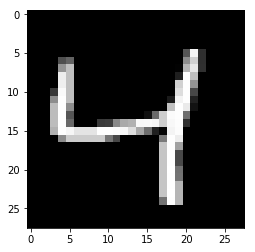

In [3]:
img = mnist.train.images[2]
plt.imshow(img.reshape((28, 28)), cmap='Greys_r')

We'll train an autoencoder with these images by flattening them into 784 length vectors. The images from this dataset are already normalized such that the values are between 0 and 1. Let's start by building basically the simplest autoencoder with a **single ReLU hidden layer**. This layer will be used as the compressed representation. Then, the encoder is the input layer and the hidden layer. The decoder is the hidden layer and the output layer. Since the images are normalized between 0 and 1, we need to use a **sigmoid activation on the output layer** to get values matching the input.

![Autoencoder architecture](assets/simple_autoencoder.png)


> **Exercise:** Build the graph for the autoencoder in the cell below. The input images will be flattened into 784 length vectors. The targets are the same as the inputs. And there should be one hidden layer with a ReLU activation and an output layer with a sigmoid activation. The loss should be calculated with the cross-entropy loss, there is a convenient TensorFlow function for this `tf.nn.sigmoid_cross_entropy_with_logits` ([documentation](https://www.tensorflow.org/api_docs/python/tf/nn/sigmoid_cross_entropy_with_logits)). You should note that `tf.nn.sigmoid_cross_entropy_with_logits` takes the logits, but to get the reconstructed images you'll need to pass the logits through the sigmoid function.

In [10]:
img_size = mnist.train.images.shape[1]
img_size

784

In [14]:
# Size of the encoding layer (the hidden layer)
encoding_dim = 32 # feel free to change this value

img_size = mnist.train.images.shape[1]

inputs_ = tf.placeholder(tf.float32, shape=(None, img_size), name='inputs')
targets_ = tf.placeholder(tf.float32, shape=(None, img_size), name='targets')

# Output of hidden layer
encoded = tf.layers.dense(inputs_, encoding_dim, activation=tf.nn.relu)

# Output layer logits
logits = tf.layers.dense(encoded, img_size)
# Sigmoid output from logits
decoded = tf.nn.sigmoid(logits, name='output')

# Sigmoid cross-entropy loss
loss =  tf.nn.sigmoid_cross_entropy_with_logits(logits=logits, labels=targets_)
# Mean of the loss
cost = tf.reduce_mean(loss)

# Adam optimizer
opt = tf.train.AdamOptimizer(0.001).minimize(cost)

## Training

In [15]:
# Create the session
sess = tf.Session()

Here I'll write a bit of code to train the network. I'm not too interested in validation here, so I'll just monitor the training loss. 

Calling `mnist.train.next_batch(batch_size)` will return a tuple of `(images, labels)`. We're not concerned with the labels here, we just need the images. Otherwise this is pretty straightfoward training with TensorFlow. We initialize the variables with `sess.run(tf.global_variables_initializer())`. Then, run the optimizer and get the loss with `batch_cost, _ = sess.run([cost, opt], feed_dict=feed)`.

In [16]:
epochs = 20
batch_size = 200
sess.run(tf.global_variables_initializer())
for e in range(epochs):
    for ii in range(mnist.train.num_examples//batch_size):
        batch = mnist.train.next_batch(batch_size)
        feed = {inputs_: batch[0], targets_: batch[0]}
        batch_cost, _ = sess.run([cost, opt], feed_dict=feed)

        print("Epoch: {}/{}...".format(e+1, epochs),
              "Training loss: {:.4f}".format(batch_cost))

Epoch: 1/20... Training loss: 0.6926
Epoch: 1/20... Training loss: 0.6892
Epoch: 1/20... Training loss: 0.6854
Epoch: 1/20... Training loss: 0.6810
Epoch: 1/20... Training loss: 0.6758
Epoch: 1/20... Training loss: 0.6682
Epoch: 1/20... Training loss: 0.6604
Epoch: 1/20... Training loss: 0.6521
Epoch: 1/20... Training loss: 0.6416
Epoch: 1/20... Training loss: 0.6285
Epoch: 1/20... Training loss: 0.6164
Epoch: 1/20... Training loss: 0.6020
Epoch: 1/20... Training loss: 0.5877
Epoch: 1/20... Training loss: 0.5707
Epoch: 1/20... Training loss: 0.5493
Epoch: 1/20... Training loss: 0.5345
Epoch: 1/20... Training loss: 0.5157
Epoch: 1/20... Training loss: 0.4973
Epoch: 1/20... Training loss: 0.4808
Epoch: 1/20... Training loss: 0.4623
Epoch: 1/20... Training loss: 0.4470
Epoch: 1/20... Training loss: 0.4292
Epoch: 1/20... Training loss: 0.4162
Epoch: 1/20... Training loss: 0.4012
Epoch: 1/20... Training loss: 0.3883
Epoch: 1/20... Training loss: 0.3740
Epoch: 1/20... Training loss: 0.3661
E

Epoch: 1/20... Training loss: 0.1904
Epoch: 1/20... Training loss: 0.1932
Epoch: 1/20... Training loss: 0.1946
Epoch: 1/20... Training loss: 0.1919
Epoch: 1/20... Training loss: 0.1906
Epoch: 1/20... Training loss: 0.1925
Epoch: 1/20... Training loss: 0.1973
Epoch: 1/20... Training loss: 0.1958
Epoch: 1/20... Training loss: 0.1903
Epoch: 1/20... Training loss: 0.1922
Epoch: 1/20... Training loss: 0.1948
Epoch: 1/20... Training loss: 0.1885
Epoch: 1/20... Training loss: 0.1892
Epoch: 1/20... Training loss: 0.1864
Epoch: 1/20... Training loss: 0.1886
Epoch: 1/20... Training loss: 0.1968
Epoch: 1/20... Training loss: 0.1894
Epoch: 1/20... Training loss: 0.1879
Epoch: 1/20... Training loss: 0.1820
Epoch: 1/20... Training loss: 0.1861
Epoch: 1/20... Training loss: 0.1857
Epoch: 1/20... Training loss: 0.1842
Epoch: 1/20... Training loss: 0.1911
Epoch: 1/20... Training loss: 0.1891
Epoch: 1/20... Training loss: 0.1872
Epoch: 1/20... Training loss: 0.1890
Epoch: 1/20... Training loss: 0.1886
E

Epoch: 2/20... Training loss: 0.1606
Epoch: 2/20... Training loss: 0.1566
Epoch: 2/20... Training loss: 0.1548
Epoch: 2/20... Training loss: 0.1634
Epoch: 2/20... Training loss: 0.1554
Epoch: 2/20... Training loss: 0.1615
Epoch: 2/20... Training loss: 0.1518
Epoch: 2/20... Training loss: 0.1578
Epoch: 2/20... Training loss: 0.1536
Epoch: 2/20... Training loss: 0.1604
Epoch: 2/20... Training loss: 0.1585
Epoch: 2/20... Training loss: 0.1543
Epoch: 2/20... Training loss: 0.1547
Epoch: 2/20... Training loss: 0.1561
Epoch: 2/20... Training loss: 0.1560
Epoch: 2/20... Training loss: 0.1515
Epoch: 2/20... Training loss: 0.1533
Epoch: 2/20... Training loss: 0.1534
Epoch: 2/20... Training loss: 0.1513
Epoch: 2/20... Training loss: 0.1563
Epoch: 2/20... Training loss: 0.1518
Epoch: 2/20... Training loss: 0.1508
Epoch: 2/20... Training loss: 0.1532
Epoch: 2/20... Training loss: 0.1557
Epoch: 2/20... Training loss: 0.1576
Epoch: 2/20... Training loss: 0.1590
Epoch: 2/20... Training loss: 0.1544
E

Epoch: 3/20... Training loss: 0.1380
Epoch: 3/20... Training loss: 0.1316
Epoch: 3/20... Training loss: 0.1392
Epoch: 3/20... Training loss: 0.1350
Epoch: 3/20... Training loss: 0.1368
Epoch: 3/20... Training loss: 0.1392
Epoch: 3/20... Training loss: 0.1343
Epoch: 3/20... Training loss: 0.1375
Epoch: 3/20... Training loss: 0.1365
Epoch: 3/20... Training loss: 0.1329
Epoch: 3/20... Training loss: 0.1370
Epoch: 3/20... Training loss: 0.1371
Epoch: 3/20... Training loss: 0.1325
Epoch: 3/20... Training loss: 0.1334
Epoch: 3/20... Training loss: 0.1395
Epoch: 3/20... Training loss: 0.1358
Epoch: 3/20... Training loss: 0.1319
Epoch: 3/20... Training loss: 0.1365
Epoch: 3/20... Training loss: 0.1307
Epoch: 3/20... Training loss: 0.1339
Epoch: 3/20... Training loss: 0.1405
Epoch: 3/20... Training loss: 0.1324
Epoch: 3/20... Training loss: 0.1350
Epoch: 3/20... Training loss: 0.1362
Epoch: 3/20... Training loss: 0.1368
Epoch: 3/20... Training loss: 0.1345
Epoch: 3/20... Training loss: 0.1353
E

Epoch: 4/20... Training loss: 0.1276
Epoch: 4/20... Training loss: 0.1286
Epoch: 4/20... Training loss: 0.1235
Epoch: 4/20... Training loss: 0.1224
Epoch: 4/20... Training loss: 0.1276
Epoch: 4/20... Training loss: 0.1240
Epoch: 4/20... Training loss: 0.1243
Epoch: 4/20... Training loss: 0.1222
Epoch: 4/20... Training loss: 0.1222
Epoch: 4/20... Training loss: 0.1264
Epoch: 4/20... Training loss: 0.1208
Epoch: 4/20... Training loss: 0.1214
Epoch: 4/20... Training loss: 0.1231
Epoch: 4/20... Training loss: 0.1258
Epoch: 4/20... Training loss: 0.1231
Epoch: 4/20... Training loss: 0.1209
Epoch: 4/20... Training loss: 0.1212
Epoch: 4/20... Training loss: 0.1227
Epoch: 4/20... Training loss: 0.1311
Epoch: 4/20... Training loss: 0.1222
Epoch: 4/20... Training loss: 0.1218
Epoch: 4/20... Training loss: 0.1238
Epoch: 4/20... Training loss: 0.1223
Epoch: 4/20... Training loss: 0.1251
Epoch: 4/20... Training loss: 0.1256
Epoch: 4/20... Training loss: 0.1240
Epoch: 4/20... Training loss: 0.1246
E

Epoch: 4/20... Training loss: 0.1182
Epoch: 4/20... Training loss: 0.1194
Epoch: 4/20... Training loss: 0.1153
Epoch: 4/20... Training loss: 0.1129
Epoch: 4/20... Training loss: 0.1158
Epoch: 4/20... Training loss: 0.1167
Epoch: 4/20... Training loss: 0.1180
Epoch: 4/20... Training loss: 0.1149
Epoch: 4/20... Training loss: 0.1153
Epoch: 4/20... Training loss: 0.1142
Epoch: 4/20... Training loss: 0.1143
Epoch: 4/20... Training loss: 0.1197
Epoch: 4/20... Training loss: 0.1170
Epoch: 4/20... Training loss: 0.1148
Epoch: 4/20... Training loss: 0.1188
Epoch: 4/20... Training loss: 0.1142
Epoch: 4/20... Training loss: 0.1164
Epoch: 4/20... Training loss: 0.1167
Epoch: 4/20... Training loss: 0.1158
Epoch: 4/20... Training loss: 0.1188
Epoch: 4/20... Training loss: 0.1147
Epoch: 4/20... Training loss: 0.1195
Epoch: 4/20... Training loss: 0.1167
Epoch: 4/20... Training loss: 0.1169
Epoch: 4/20... Training loss: 0.1170
Epoch: 4/20... Training loss: 0.1153
Epoch: 4/20... Training loss: 0.1176
E

Epoch: 5/20... Training loss: 0.1095
Epoch: 5/20... Training loss: 0.1134
Epoch: 5/20... Training loss: 0.1107
Epoch: 5/20... Training loss: 0.1084
Epoch: 5/20... Training loss: 0.1085
Epoch: 5/20... Training loss: 0.1097
Epoch: 5/20... Training loss: 0.1090
Epoch: 5/20... Training loss: 0.1076
Epoch: 5/20... Training loss: 0.1051
Epoch: 5/20... Training loss: 0.1110
Epoch: 5/20... Training loss: 0.1115
Epoch: 5/20... Training loss: 0.1085
Epoch: 5/20... Training loss: 0.1116
Epoch: 5/20... Training loss: 0.1072
Epoch: 5/20... Training loss: 0.1043
Epoch: 5/20... Training loss: 0.1101
Epoch: 5/20... Training loss: 0.1066
Epoch: 5/20... Training loss: 0.1130
Epoch: 5/20... Training loss: 0.1131
Epoch: 5/20... Training loss: 0.1079
Epoch: 5/20... Training loss: 0.1036
Epoch: 5/20... Training loss: 0.1091
Epoch: 5/20... Training loss: 0.1074
Epoch: 5/20... Training loss: 0.1130
Epoch: 5/20... Training loss: 0.1141
Epoch: 5/20... Training loss: 0.1079
Epoch: 5/20... Training loss: 0.1122
E

Epoch: 6/20... Training loss: 0.1072
Epoch: 6/20... Training loss: 0.1039
Epoch: 6/20... Training loss: 0.1069
Epoch: 6/20... Training loss: 0.1004
Epoch: 6/20... Training loss: 0.1002
Epoch: 6/20... Training loss: 0.1030
Epoch: 6/20... Training loss: 0.1033
Epoch: 6/20... Training loss: 0.1006
Epoch: 6/20... Training loss: 0.1039
Epoch: 6/20... Training loss: 0.1077
Epoch: 6/20... Training loss: 0.1025
Epoch: 6/20... Training loss: 0.1049
Epoch: 6/20... Training loss: 0.1040
Epoch: 6/20... Training loss: 0.1082
Epoch: 6/20... Training loss: 0.1038
Epoch: 6/20... Training loss: 0.1029
Epoch: 6/20... Training loss: 0.1034
Epoch: 6/20... Training loss: 0.1062
Epoch: 6/20... Training loss: 0.1032
Epoch: 6/20... Training loss: 0.1075
Epoch: 6/20... Training loss: 0.1037
Epoch: 6/20... Training loss: 0.1094
Epoch: 6/20... Training loss: 0.1057
Epoch: 6/20... Training loss: 0.1067
Epoch: 6/20... Training loss: 0.1012
Epoch: 6/20... Training loss: 0.1043
Epoch: 6/20... Training loss: 0.1019
E

Epoch: 7/20... Training loss: 0.1040
Epoch: 7/20... Training loss: 0.0979
Epoch: 7/20... Training loss: 0.0988
Epoch: 7/20... Training loss: 0.0996
Epoch: 7/20... Training loss: 0.1032
Epoch: 7/20... Training loss: 0.0994
Epoch: 7/20... Training loss: 0.1013
Epoch: 7/20... Training loss: 0.1029
Epoch: 7/20... Training loss: 0.0982
Epoch: 7/20... Training loss: 0.1004
Epoch: 7/20... Training loss: 0.1009
Epoch: 7/20... Training loss: 0.1039
Epoch: 7/20... Training loss: 0.1007
Epoch: 7/20... Training loss: 0.1030
Epoch: 7/20... Training loss: 0.1035
Epoch: 7/20... Training loss: 0.1052
Epoch: 7/20... Training loss: 0.1006
Epoch: 7/20... Training loss: 0.0979
Epoch: 7/20... Training loss: 0.0996
Epoch: 7/20... Training loss: 0.0996
Epoch: 7/20... Training loss: 0.1025
Epoch: 7/20... Training loss: 0.0982
Epoch: 7/20... Training loss: 0.1019
Epoch: 7/20... Training loss: 0.0971
Epoch: 7/20... Training loss: 0.1068
Epoch: 7/20... Training loss: 0.1038
Epoch: 7/20... Training loss: 0.0995
E

Epoch: 8/20... Training loss: 0.0995
Epoch: 8/20... Training loss: 0.1038
Epoch: 8/20... Training loss: 0.1003
Epoch: 8/20... Training loss: 0.0967
Epoch: 8/20... Training loss: 0.1008
Epoch: 8/20... Training loss: 0.1001
Epoch: 8/20... Training loss: 0.0962
Epoch: 8/20... Training loss: 0.0979
Epoch: 8/20... Training loss: 0.0945
Epoch: 8/20... Training loss: 0.0981
Epoch: 8/20... Training loss: 0.0999
Epoch: 8/20... Training loss: 0.0995
Epoch: 8/20... Training loss: 0.0989
Epoch: 8/20... Training loss: 0.0966
Epoch: 8/20... Training loss: 0.0971
Epoch: 8/20... Training loss: 0.0957
Epoch: 8/20... Training loss: 0.0963
Epoch: 8/20... Training loss: 0.0968
Epoch: 8/20... Training loss: 0.0980
Epoch: 8/20... Training loss: 0.0964
Epoch: 8/20... Training loss: 0.0996
Epoch: 8/20... Training loss: 0.0995
Epoch: 8/20... Training loss: 0.1028
Epoch: 8/20... Training loss: 0.0987
Epoch: 8/20... Training loss: 0.1039
Epoch: 8/20... Training loss: 0.1006
Epoch: 8/20... Training loss: 0.0968
E

Epoch: 8/20... Training loss: 0.0971
Epoch: 8/20... Training loss: 0.0988
Epoch: 8/20... Training loss: 0.0977
Epoch: 8/20... Training loss: 0.0960
Epoch: 8/20... Training loss: 0.0939
Epoch: 8/20... Training loss: 0.0945
Epoch: 9/20... Training loss: 0.0954
Epoch: 9/20... Training loss: 0.0976
Epoch: 9/20... Training loss: 0.0944
Epoch: 9/20... Training loss: 0.0996
Epoch: 9/20... Training loss: 0.0976
Epoch: 9/20... Training loss: 0.0986
Epoch: 9/20... Training loss: 0.0989
Epoch: 9/20... Training loss: 0.0982
Epoch: 9/20... Training loss: 0.0982
Epoch: 9/20... Training loss: 0.0940
Epoch: 9/20... Training loss: 0.0970
Epoch: 9/20... Training loss: 0.0992
Epoch: 9/20... Training loss: 0.0950
Epoch: 9/20... Training loss: 0.0923
Epoch: 9/20... Training loss: 0.0965
Epoch: 9/20... Training loss: 0.0971
Epoch: 9/20... Training loss: 0.0946
Epoch: 9/20... Training loss: 0.0977
Epoch: 9/20... Training loss: 0.0957
Epoch: 9/20... Training loss: 0.0957
Epoch: 9/20... Training loss: 0.0968
E

Epoch: 9/20... Training loss: 0.0958
Epoch: 9/20... Training loss: 0.0969
Epoch: 9/20... Training loss: 0.0935
Epoch: 9/20... Training loss: 0.0986
Epoch: 9/20... Training loss: 0.0985
Epoch: 9/20... Training loss: 0.0954
Epoch: 9/20... Training loss: 0.0995
Epoch: 9/20... Training loss: 0.0967
Epoch: 9/20... Training loss: 0.0970
Epoch: 9/20... Training loss: 0.0973
Epoch: 9/20... Training loss: 0.0956
Epoch: 9/20... Training loss: 0.0963
Epoch: 9/20... Training loss: 0.0969
Epoch: 9/20... Training loss: 0.0972
Epoch: 9/20... Training loss: 0.0942
Epoch: 9/20... Training loss: 0.0970
Epoch: 9/20... Training loss: 0.0920
Epoch: 9/20... Training loss: 0.0919
Epoch: 9/20... Training loss: 0.0946
Epoch: 9/20... Training loss: 0.0939
Epoch: 9/20... Training loss: 0.0941
Epoch: 9/20... Training loss: 0.0971
Epoch: 9/20... Training loss: 0.0898
Epoch: 9/20... Training loss: 0.0975
Epoch: 9/20... Training loss: 0.0976
Epoch: 9/20... Training loss: 0.0943
Epoch: 9/20... Training loss: 0.0985
E

Epoch: 10/20... Training loss: 0.0940
Epoch: 10/20... Training loss: 0.0925
Epoch: 10/20... Training loss: 0.0964
Epoch: 10/20... Training loss: 0.0944
Epoch: 10/20... Training loss: 0.0930
Epoch: 10/20... Training loss: 0.0914
Epoch: 10/20... Training loss: 0.0949
Epoch: 10/20... Training loss: 0.0967
Epoch: 10/20... Training loss: 0.0929
Epoch: 10/20... Training loss: 0.0967
Epoch: 10/20... Training loss: 0.0953
Epoch: 10/20... Training loss: 0.0982
Epoch: 10/20... Training loss: 0.0951
Epoch: 10/20... Training loss: 0.0982
Epoch: 10/20... Training loss: 0.0985
Epoch: 10/20... Training loss: 0.0986
Epoch: 10/20... Training loss: 0.0938
Epoch: 10/20... Training loss: 0.0976
Epoch: 10/20... Training loss: 0.0920
Epoch: 10/20... Training loss: 0.0961
Epoch: 10/20... Training loss: 0.0973
Epoch: 10/20... Training loss: 0.0940
Epoch: 10/20... Training loss: 0.0964
Epoch: 10/20... Training loss: 0.0967
Epoch: 10/20... Training loss: 0.0955
Epoch: 10/20... Training loss: 0.0952
Epoch: 10/20

Epoch: 11/20... Training loss: 0.0918
Epoch: 11/20... Training loss: 0.0970
Epoch: 11/20... Training loss: 0.0904
Epoch: 11/20... Training loss: 0.0940
Epoch: 11/20... Training loss: 0.0954
Epoch: 11/20... Training loss: 0.0957
Epoch: 11/20... Training loss: 0.0960
Epoch: 11/20... Training loss: 0.0949
Epoch: 11/20... Training loss: 0.0927
Epoch: 11/20... Training loss: 0.0925
Epoch: 11/20... Training loss: 0.0948
Epoch: 11/20... Training loss: 0.0913
Epoch: 11/20... Training loss: 0.0966
Epoch: 11/20... Training loss: 0.0936
Epoch: 11/20... Training loss: 0.0972
Epoch: 11/20... Training loss: 0.0949
Epoch: 11/20... Training loss: 0.0917
Epoch: 11/20... Training loss: 0.0955
Epoch: 11/20... Training loss: 0.0926
Epoch: 11/20... Training loss: 0.0933
Epoch: 11/20... Training loss: 0.0930
Epoch: 11/20... Training loss: 0.0942
Epoch: 11/20... Training loss: 0.0965
Epoch: 11/20... Training loss: 0.0945
Epoch: 11/20... Training loss: 0.0938
Epoch: 11/20... Training loss: 0.0945
Epoch: 11/20

Epoch: 12/20... Training loss: 0.0930
Epoch: 12/20... Training loss: 0.0944
Epoch: 12/20... Training loss: 0.0928
Epoch: 12/20... Training loss: 0.0911
Epoch: 12/20... Training loss: 0.0938
Epoch: 12/20... Training loss: 0.0931
Epoch: 12/20... Training loss: 0.0935
Epoch: 12/20... Training loss: 0.0962
Epoch: 12/20... Training loss: 0.0946
Epoch: 12/20... Training loss: 0.0934
Epoch: 12/20... Training loss: 0.0941
Epoch: 12/20... Training loss: 0.0934
Epoch: 12/20... Training loss: 0.0970
Epoch: 12/20... Training loss: 0.0936
Epoch: 12/20... Training loss: 0.0965
Epoch: 12/20... Training loss: 0.0922
Epoch: 12/20... Training loss: 0.0939
Epoch: 12/20... Training loss: 0.0959
Epoch: 12/20... Training loss: 0.0956
Epoch: 12/20... Training loss: 0.0916
Epoch: 12/20... Training loss: 0.0935
Epoch: 12/20... Training loss: 0.0938
Epoch: 12/20... Training loss: 0.0968
Epoch: 12/20... Training loss: 0.0950
Epoch: 12/20... Training loss: 0.0944
Epoch: 12/20... Training loss: 0.0926
Epoch: 12/20

Epoch: 13/20... Training loss: 0.0947
Epoch: 13/20... Training loss: 0.0937
Epoch: 13/20... Training loss: 0.0957
Epoch: 13/20... Training loss: 0.0939
Epoch: 13/20... Training loss: 0.0954
Epoch: 13/20... Training loss: 0.0931
Epoch: 13/20... Training loss: 0.0937
Epoch: 13/20... Training loss: 0.0945
Epoch: 13/20... Training loss: 0.0933
Epoch: 13/20... Training loss: 0.0960
Epoch: 13/20... Training loss: 0.0961
Epoch: 13/20... Training loss: 0.0911
Epoch: 13/20... Training loss: 0.0981
Epoch: 13/20... Training loss: 0.0945
Epoch: 13/20... Training loss: 0.0941
Epoch: 13/20... Training loss: 0.0937
Epoch: 13/20... Training loss: 0.0949
Epoch: 13/20... Training loss: 0.0934
Epoch: 13/20... Training loss: 0.0945
Epoch: 13/20... Training loss: 0.0928
Epoch: 13/20... Training loss: 0.0958
Epoch: 13/20... Training loss: 0.0947
Epoch: 13/20... Training loss: 0.0977
Epoch: 13/20... Training loss: 0.0897
Epoch: 13/20... Training loss: 0.0928
Epoch: 13/20... Training loss: 0.0948
Epoch: 13/20

Epoch: 13/20... Training loss: 0.0942
Epoch: 13/20... Training loss: 0.0939
Epoch: 13/20... Training loss: 0.0974
Epoch: 13/20... Training loss: 0.0929
Epoch: 13/20... Training loss: 0.0948
Epoch: 13/20... Training loss: 0.0977
Epoch: 13/20... Training loss: 0.0918
Epoch: 13/20... Training loss: 0.0930
Epoch: 13/20... Training loss: 0.0899
Epoch: 13/20... Training loss: 0.0938
Epoch: 13/20... Training loss: 0.0934
Epoch: 13/20... Training loss: 0.0908
Epoch: 13/20... Training loss: 0.0977
Epoch: 13/20... Training loss: 0.0896
Epoch: 13/20... Training loss: 0.0954
Epoch: 13/20... Training loss: 0.0925
Epoch: 13/20... Training loss: 0.0897
Epoch: 13/20... Training loss: 0.0897
Epoch: 13/20... Training loss: 0.0957
Epoch: 13/20... Training loss: 0.0947
Epoch: 13/20... Training loss: 0.0953
Epoch: 13/20... Training loss: 0.0948
Epoch: 13/20... Training loss: 0.0907
Epoch: 13/20... Training loss: 0.0985
Epoch: 13/20... Training loss: 0.0932
Epoch: 13/20... Training loss: 0.0947
Epoch: 13/20

Epoch: 14/20... Training loss: 0.0961
Epoch: 14/20... Training loss: 0.0945
Epoch: 14/20... Training loss: 0.0981
Epoch: 14/20... Training loss: 0.0913
Epoch: 14/20... Training loss: 0.0914
Epoch: 14/20... Training loss: 0.0959
Epoch: 14/20... Training loss: 0.0926
Epoch: 14/20... Training loss: 0.0957
Epoch: 14/20... Training loss: 0.0979
Epoch: 14/20... Training loss: 0.0937
Epoch: 14/20... Training loss: 0.0943
Epoch: 14/20... Training loss: 0.0932
Epoch: 14/20... Training loss: 0.0954
Epoch: 14/20... Training loss: 0.0901
Epoch: 14/20... Training loss: 0.0905
Epoch: 14/20... Training loss: 0.0925
Epoch: 14/20... Training loss: 0.0918
Epoch: 14/20... Training loss: 0.0925
Epoch: 14/20... Training loss: 0.0977
Epoch: 14/20... Training loss: 0.0899
Epoch: 14/20... Training loss: 0.0980
Epoch: 14/20... Training loss: 0.0910
Epoch: 14/20... Training loss: 0.0923
Epoch: 14/20... Training loss: 0.0958
Epoch: 14/20... Training loss: 0.0944
Epoch: 14/20... Training loss: 0.0929
Epoch: 14/20

Epoch: 15/20... Training loss: 0.0970
Epoch: 15/20... Training loss: 0.0902
Epoch: 15/20... Training loss: 0.0930
Epoch: 15/20... Training loss: 0.0897
Epoch: 15/20... Training loss: 0.0939
Epoch: 15/20... Training loss: 0.0980
Epoch: 15/20... Training loss: 0.0914
Epoch: 15/20... Training loss: 0.0975
Epoch: 15/20... Training loss: 0.0928
Epoch: 15/20... Training loss: 0.0934
Epoch: 15/20... Training loss: 0.0972
Epoch: 15/20... Training loss: 0.0932
Epoch: 15/20... Training loss: 0.0909
Epoch: 15/20... Training loss: 0.0939
Epoch: 15/20... Training loss: 0.0947
Epoch: 15/20... Training loss: 0.0960
Epoch: 15/20... Training loss: 0.0917
Epoch: 15/20... Training loss: 0.0954
Epoch: 15/20... Training loss: 0.0971
Epoch: 15/20... Training loss: 0.0951
Epoch: 15/20... Training loss: 0.0945
Epoch: 15/20... Training loss: 0.0960
Epoch: 15/20... Training loss: 0.0923
Epoch: 15/20... Training loss: 0.0939
Epoch: 15/20... Training loss: 0.0921
Epoch: 15/20... Training loss: 0.0959
Epoch: 15/20

Epoch: 16/20... Training loss: 0.0920
Epoch: 16/20... Training loss: 0.0941
Epoch: 16/20... Training loss: 0.0910
Epoch: 16/20... Training loss: 0.0927
Epoch: 16/20... Training loss: 0.0942
Epoch: 16/20... Training loss: 0.0972
Epoch: 16/20... Training loss: 0.0940
Epoch: 16/20... Training loss: 0.0947
Epoch: 16/20... Training loss: 0.0968
Epoch: 16/20... Training loss: 0.0924
Epoch: 16/20... Training loss: 0.0922
Epoch: 16/20... Training loss: 0.0907
Epoch: 16/20... Training loss: 0.0911
Epoch: 16/20... Training loss: 0.0926
Epoch: 16/20... Training loss: 0.0921
Epoch: 16/20... Training loss: 0.0944
Epoch: 16/20... Training loss: 0.0948
Epoch: 16/20... Training loss: 0.0922
Epoch: 16/20... Training loss: 0.0931
Epoch: 16/20... Training loss: 0.0972
Epoch: 16/20... Training loss: 0.0948
Epoch: 16/20... Training loss: 0.0921
Epoch: 16/20... Training loss: 0.0941
Epoch: 16/20... Training loss: 0.0956
Epoch: 16/20... Training loss: 0.0932
Epoch: 16/20... Training loss: 0.0930
Epoch: 16/20

Epoch: 17/20... Training loss: 0.0930
Epoch: 17/20... Training loss: 0.0920
Epoch: 17/20... Training loss: 0.0951
Epoch: 17/20... Training loss: 0.0936
Epoch: 17/20... Training loss: 0.0913
Epoch: 17/20... Training loss: 0.0934
Epoch: 17/20... Training loss: 0.0927
Epoch: 17/20... Training loss: 0.0927
Epoch: 17/20... Training loss: 0.0970
Epoch: 17/20... Training loss: 0.0917
Epoch: 17/20... Training loss: 0.0929
Epoch: 17/20... Training loss: 0.0942
Epoch: 17/20... Training loss: 0.0943
Epoch: 17/20... Training loss: 0.0938
Epoch: 17/20... Training loss: 0.0925
Epoch: 17/20... Training loss: 0.0913
Epoch: 17/20... Training loss: 0.0949
Epoch: 17/20... Training loss: 0.0928
Epoch: 17/20... Training loss: 0.0910
Epoch: 17/20... Training loss: 0.0948
Epoch: 17/20... Training loss: 0.0930
Epoch: 17/20... Training loss: 0.0929
Epoch: 17/20... Training loss: 0.0915
Epoch: 17/20... Training loss: 0.0959
Epoch: 17/20... Training loss: 0.0951
Epoch: 17/20... Training loss: 0.0958
Epoch: 17/20

Epoch: 17/20... Training loss: 0.0953
Epoch: 17/20... Training loss: 0.0955
Epoch: 17/20... Training loss: 0.0934
Epoch: 17/20... Training loss: 0.0937
Epoch: 17/20... Training loss: 0.0944
Epoch: 17/20... Training loss: 0.0932
Epoch: 17/20... Training loss: 0.0908
Epoch: 17/20... Training loss: 0.0956
Epoch: 17/20... Training loss: 0.0936
Epoch: 17/20... Training loss: 0.0952
Epoch: 17/20... Training loss: 0.0926
Epoch: 17/20... Training loss: 0.0924
Epoch: 17/20... Training loss: 0.0939
Epoch: 17/20... Training loss: 0.0911
Epoch: 17/20... Training loss: 0.0934
Epoch: 17/20... Training loss: 0.0949
Epoch: 17/20... Training loss: 0.0951
Epoch: 17/20... Training loss: 0.0958
Epoch: 17/20... Training loss: 0.0929
Epoch: 17/20... Training loss: 0.0899
Epoch: 17/20... Training loss: 0.0943
Epoch: 17/20... Training loss: 0.0945
Epoch: 17/20... Training loss: 0.0936
Epoch: 17/20... Training loss: 0.0913
Epoch: 17/20... Training loss: 0.0936
Epoch: 17/20... Training loss: 0.0955
Epoch: 17/20

Epoch: 18/20... Training loss: 0.0910
Epoch: 18/20... Training loss: 0.0906
Epoch: 18/20... Training loss: 0.0947
Epoch: 18/20... Training loss: 0.0942
Epoch: 18/20... Training loss: 0.0922
Epoch: 18/20... Training loss: 0.0923
Epoch: 18/20... Training loss: 0.0898
Epoch: 18/20... Training loss: 0.0955
Epoch: 18/20... Training loss: 0.0930
Epoch: 18/20... Training loss: 0.0966
Epoch: 18/20... Training loss: 0.0941
Epoch: 18/20... Training loss: 0.0934
Epoch: 18/20... Training loss: 0.0926
Epoch: 18/20... Training loss: 0.0928
Epoch: 18/20... Training loss: 0.0940
Epoch: 18/20... Training loss: 0.0950
Epoch: 18/20... Training loss: 0.0913
Epoch: 18/20... Training loss: 0.0943
Epoch: 18/20... Training loss: 0.0925
Epoch: 18/20... Training loss: 0.0951
Epoch: 18/20... Training loss: 0.0902
Epoch: 18/20... Training loss: 0.0887
Epoch: 18/20... Training loss: 0.0952
Epoch: 18/20... Training loss: 0.0933
Epoch: 18/20... Training loss: 0.0933
Epoch: 18/20... Training loss: 0.0937
Epoch: 18/20

Epoch: 19/20... Training loss: 0.0940
Epoch: 19/20... Training loss: 0.0894
Epoch: 19/20... Training loss: 0.0941
Epoch: 19/20... Training loss: 0.0897
Epoch: 19/20... Training loss: 0.0913
Epoch: 19/20... Training loss: 0.0955
Epoch: 19/20... Training loss: 0.0928
Epoch: 19/20... Training loss: 0.0890
Epoch: 19/20... Training loss: 0.0930
Epoch: 19/20... Training loss: 0.0931
Epoch: 19/20... Training loss: 0.0899
Epoch: 19/20... Training loss: 0.0948
Epoch: 19/20... Training loss: 0.0934
Epoch: 19/20... Training loss: 0.0957
Epoch: 19/20... Training loss: 0.0937
Epoch: 19/20... Training loss: 0.0910
Epoch: 19/20... Training loss: 0.0899
Epoch: 19/20... Training loss: 0.0954
Epoch: 19/20... Training loss: 0.0947
Epoch: 19/20... Training loss: 0.0938
Epoch: 19/20... Training loss: 0.0968
Epoch: 19/20... Training loss: 0.0955
Epoch: 19/20... Training loss: 0.0918
Epoch: 19/20... Training loss: 0.0924
Epoch: 19/20... Training loss: 0.0934
Epoch: 19/20... Training loss: 0.0938
Epoch: 19/20

Epoch: 20/20... Training loss: 0.0953
Epoch: 20/20... Training loss: 0.0941
Epoch: 20/20... Training loss: 0.0910
Epoch: 20/20... Training loss: 0.0948
Epoch: 20/20... Training loss: 0.0934
Epoch: 20/20... Training loss: 0.0949
Epoch: 20/20... Training loss: 0.0935
Epoch: 20/20... Training loss: 0.0934
Epoch: 20/20... Training loss: 0.0947
Epoch: 20/20... Training loss: 0.0944
Epoch: 20/20... Training loss: 0.0919
Epoch: 20/20... Training loss: 0.0925
Epoch: 20/20... Training loss: 0.0917
Epoch: 20/20... Training loss: 0.0943
Epoch: 20/20... Training loss: 0.0956
Epoch: 20/20... Training loss: 0.0912
Epoch: 20/20... Training loss: 0.0908
Epoch: 20/20... Training loss: 0.0923
Epoch: 20/20... Training loss: 0.0942
Epoch: 20/20... Training loss: 0.0924
Epoch: 20/20... Training loss: 0.0917
Epoch: 20/20... Training loss: 0.0917
Epoch: 20/20... Training loss: 0.0949
Epoch: 20/20... Training loss: 0.0952
Epoch: 20/20... Training loss: 0.0919
Epoch: 20/20... Training loss: 0.0950
Epoch: 20/20

## Checking out the results

Below I've plotted some of the test images along with their reconstructions. For the most part these look pretty good except for some blurriness in some parts.

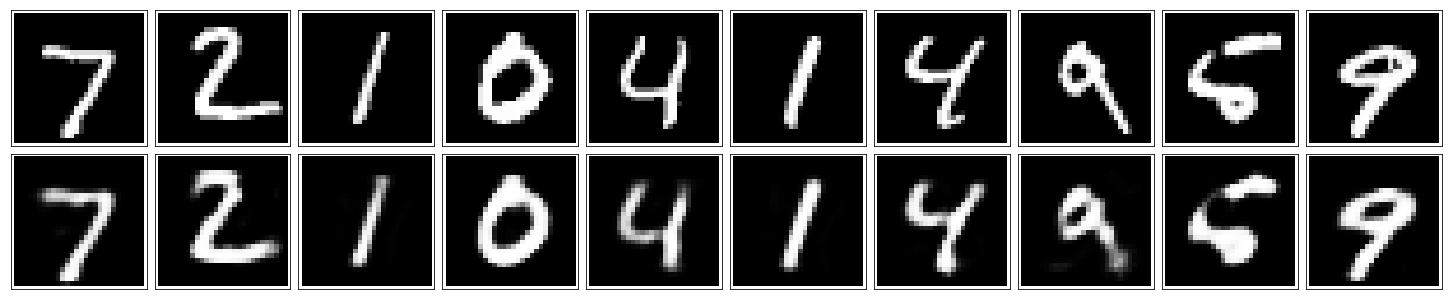

In [17]:
fig, axes = plt.subplots(nrows=2, ncols=10, sharex=True, sharey=True, figsize=(20,4))
in_imgs = mnist.test.images[:10]
reconstructed, compressed = sess.run([decoded, encoded], feed_dict={inputs_: in_imgs})

for images, row in zip([in_imgs, reconstructed], axes):
    for img, ax in zip(images, row):
        ax.imshow(img.reshape((28, 28)), cmap='Greys_r')
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

fig.tight_layout(pad=0.1)

In [18]:
sess.close()

## Up Next

We're dealing with images here, so we can (usually) get better performance using convolution layers. So, next we'll build a better autoencoder with convolutional layers.

In practice, autoencoders aren't actually better at compression compared to typical methods like JPEGs and MP3s. But, they are being used for noise reduction, which you'll also build.